# I. Compréhension des données : Analyse des données d'entraînement

Dans cette partie, nous allons réaliser les opérations d'affichage manuellement pour avoir une vue d'ensemble sur les données

## I.a Imports

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.io
#import warnings
from sklearn.decomposition import PCA

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

Nous avons besoin d'utiliser différentes librairies :
- numpy pour effectuer tous les calculs matriciels rapidement,
- matplotlib pour afficher les résultats de nos courbes,
- pandas pour récupérer ou sauvegarder les données d'un fichier CSV,
- sklearn pour utiliser tous les outils disponibles pour l'exploration et l'analyse des données.

## I.b Chargement des données :

In [78]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# charge value
Train = train_df.values
Test = test_df.values

# charge value to train model
X = (Train[:,1:])
Y = (Train[:,0])

Pour charger les données, nous utilisons la fonctions prédéfinis read_csv présentes dans la librairies de Pandas permettant de créer une variable de type Dataframe. Elle correspond à un tableau possédant différents types chargés automatiquement.

Dans les variables Train et Test, nous mettons les valeurs des dataframes précédemment chargées.

Puis, dans la variable X et Y, nous ajoutons les données du fichier d'entrainement en retirant bien l'entête du fichier.
- La variable X permet d'avoir chaque image.
- La variable Y permet d'avoir chaque chiffre correspondant à la précédente image.

## I.c Préparation des données

In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Nous récupérons dans un premier temps le schéma des données, présent dans le document d'entraînement "train.csv" :

In [80]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Cette commande nous indique qu'il y a en tout 785 colonnes :

- La première colonne correspond à la colonne des étiquettes,
- Les autres colonnes correspondent à la suite des valeurs des pixels de chaque image.

Ainsi, chaque ligne du fichier, à l'exception de la première qui correspond au schéma présenté ci-dessus, représente une image par la suite des valeurs de ses pixels. Les images font donc 784 pixels chacune.

Le premier élément de la ligne est l'étiquette, ici c'est un nombre qui correspond au digit (nombre) que représente l'image.

Nous allons donc réaliser du __Machine Learning supervisé__.

#### Visualisation et description générale des données :

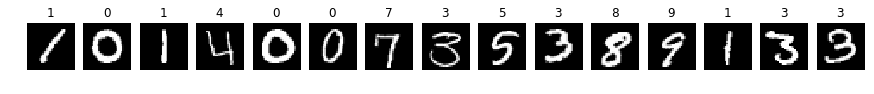

In [81]:
fig1, ax1 = plt.subplots(1,15, figsize=(15,10))
for i in range(15):
    ax1[i].imshow(X[i].reshape((28,28)), cmap='gray')
    ax1[i].axis('off')
    ax1[i].set_title(Y[i])
    


Nous allons afficher nos 15 premières lignes du fichier train. Le but de cette manoeuvre est de vérifier que notre fichier d'entrainement possède les bonnes données.

Nous constatons que chaque chiffre correspond à son image, nous pouvons passer à la suite de la préparation des données.

In [82]:
# Prévisualisation des données
print(train_df.head())

# Description des données
print(train_df.info())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

On peut voir que l'objet pandas qui a servi au chargement des données, retourne un objet de type Data Frame.
Cette commande nous indique également qu'il y a 42000 lignes :

- Comme dit précédemment, la première correspond à l'étiquette,
- Les 41999 autres lignes sont les images.

Les valeurs stockées sont toutes des entiers.

Les 785 colonnes contiennent toutes des valeurs catégoriques (à l'exception de la première ligne qui contient les noms des colonnes).

#### Les données présentent-elles des trous ou des valeurs non entières ?

In [83]:
if True in np.isnan(train_df).any():
    print("Corrupt")
else:
    print("Not corrupt")


Not corrupt


Cette fonction nous apprend que nos données sont correctement formées et toutes les valeurs sont bien des entiers.

Cette étape est indispensable pour la préparation des données. Avoir des données fiables permet d'obtenir un taux de prédiction important.

En exécutant cette fonction, nous obtenons la valeur true, il n'y a donc pas de valeur manquante.

#### Étudions maintenant la plage de données de chaque colonne :

In [84]:
def getColumnsRange(matrix):

	output = []

	for col in range(len(matrix[0])):
		colRange = []
		for line in range(len(matrix)):
			value = matrix[line][col]
			if not (value in colRange):
				colRange.append(value)
			colRange.sort()

		output.append(colRange)

	return output
matrix = train_df.values.tolist()
print(train_df.describe())
print(getColumnsRange(matrix))

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8    ...         pixel774      pixel775  \
count  42000.0  42000.0  42000.0    ...     42000.000000  42000.000000   
mean       0.0      0.0      0.0    ...         0.219286      0.117095   
std        0.0      0.0      0.0    ...         6.312890      4.633819   
min       

On observe ainsi que la première colonne, la colonne des étiquettes prend les valeurs suivantes : de 0 à 9

Et les autres colonnes prennent les valeurs suivantes :  de 0 à 255.
Cela confirme donc que les données contiennent des images représentant les chiffres 0, 1, 2, ..., 9
En d'autre terme une image représente bien un unique chiffre et ce chiffre peut être un 0, un 1, ... ou un 9.
De plus, les images sont représentées en niveaux de gris et sont codées sur 8 bits.

Enfin, on peut également observer que des colonnes ne possèdent que très peu de valeurs, voir qu'une seule (pixel noir). Cela signifie que nos images ont des portions communes qui sont identiques (les chiffres sont entourés de couleur noire dans chaque image. Nous verrons par la suite s'il est intéressant d'enlever ces colonnes.

## I.d Analyse des données

#### Étudions maintenant la distribution des données :

[(1, 11.152380952380952), (0, 9.838095238095237), (4, 9.695238095238096), (7, 10.47857142857143), (3, 10.359523809523811), (5, 9.035714285714286), (8, 9.673809523809524), (9, 9.971428571428572), (2, 9.945238095238096), (6, 9.85)]


/Users/salah-eddinealaoui/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


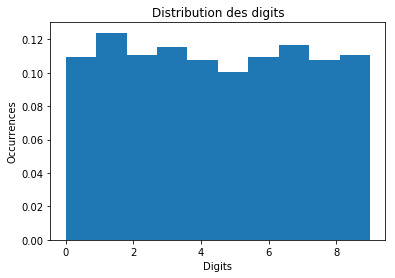

<Figure size 432x288 with 0 Axes>

In [86]:
from collections import Counter
c = Counter(Y)
c = [(i, c[i] / len(Y) * 100.0) for i in c]
print(c)
plt.hist(Y, normed=True)
plt.title("Distribution des digits")
plt.xlabel("Digits")
plt.ylabel("Occurrences")
plt.show()
plt.savefig('fooo.png')

On observe ainsi que les données sont réparties dans les bonnes proportions, cependant nous remarquons que nous n'avons pas exactement 10% pour chaque digit, cela pourrait impacter les performances des algorithmes de machine learning que nous utiliserons ultérieurement

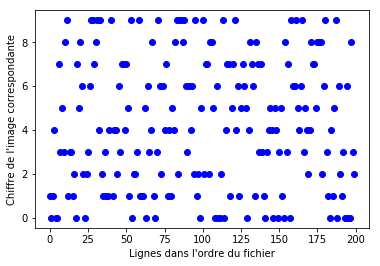

In [87]:
def getDitributionAxes(matrix, numberOfLines):

	x = []
	y = []

	for i in range(numberOfLines):
		x.append(i)
		y.append(matrix[i][0])

	return (x, y)

# on affiche seulement les 200 premières valeurs pour avoir un meilleur affichage
x, y = getDitributionAxes(matrix, 200)

plt.plot(x, y, "bo")
plt.xlabel("Lignes dans l'ordre du fichier")
plt.ylabel("Chiffre de l'image correspondante")
plt.savefig("distribution.png")

De plus, les images sont mélangées selon une loi uniforme : en traçant un graphe avec les digits dans l'ordre du fichier, on observe bien un nuage de points. Ceci est important pour l'évaluation du modèle : par exemple, si le modèle apprend sur 200 lignes et que ces 200 lignes sont composées à 50% du digit 0, 50% du digit 1, si on teste sur d'autres lignes qui ne contiennent que des digits 2 et 4 par exemple, alors notre modèle sera testé sur des valeurs qu'il n'a jamais vu et on fera une évaluation totalement fausse.

Autre exemple : si nos données sont composées à 80% du digit 0, alors l'évaluation des données de test reviendra à une probabilité : on aura environ 80% de digits 0 identifiés.

#### Représentation de la variance

On souhaite maintenant analyser la variance de chaque colonne de nos données. La variance permet ainsi de mesurer le nombre d'informations de chaque colonne on va s'intéresser au nombre d'occurrences de chaque variance trouvée.

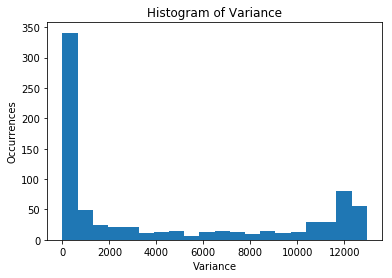

In [88]:
variance_hist = np.var(X, axis = 0)
plt.hist(variance_hist, 20)
plt.title("Histogram of Variance")
plt.xlabel("Variance")
plt.ylabel("Occurrences")
plt.savefig("distribution.png")

On constate alors que la grande majorité des colonnes ne contient que très peu d'informations. En effet, la plupart des variances trouvées sont proches de 0. Il sera donc utile de s'interroger s'il ne serait pas efficace de supprimer ces colonnes peu informatives pour gagner en temps de calcul.

#### Visualisation de toutes les données

L'utilité de la réduction de dimensionnalité peut ne pas être entièrement évidente dans deux dimensions seulement, mais devient beaucoup plus claire lorsque l'on regarde des données de grande dimension. Dans notre cas nous sommes en dimension 784, cela est donc difficile de visualiser nos données dans l'ensemble. L'utilité de PCA dans un premier temps est de nous permettre de retourner en dimension 2 pour visualiser nos données. 

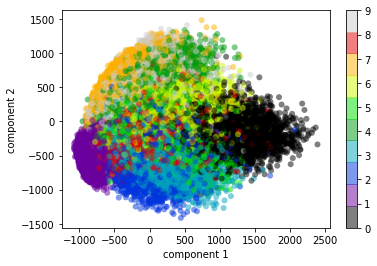

In [89]:
pca_vizualise = PCA(2)  # project from 64 to 2 dimensions
projected = pca_vizualise.fit_transform(X)

plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.savefig("pca.png")

L'ensemble des données est un nuage de points de 784 dimensions, et ces points sont la projection de chaque point de données le long des directions présentant la variance la plus grande. Pour l'essentiel, nous avons trouvé l'étirement et la rotation optimaux dans un espace à 784 dimensions qui nous permet de voir la disposition des chiffres en deux dimensions, et ce, de manière non supervisée, c'est-à-dire sans référence aux étiquettes.

----------------------------------------------------------------

# Utilisation des Algorithme

## A. Réduction des données en utilisant PCA

Une des applications les plus importantes de la PCA est d’accélérer les algorithmes d’apprentissage automatique. Pour cela, nous faisons l'hypothèse que le nombre de colonnes, c'est à dire le nombre de dimensions, peut être réduit. En effet, comme nous avons pu le constater précédemment avec la variance, un grand nombre de colonnes ne présente que très peu d'informations. 

In [91]:
from sklearn.decomposition import PCA
import copy

# ## Removing the column with variance 0
variance = np.var(X, axis = 0)>1000 
print(variance.shape)
X = X[:, variance]
Test = Test[:,variance]
print(X.shape)
# ##Calculate Principal Components
pca = PCA() # Création du model
pca.fit(X) # On adapte le model à X


(412,)
(42000, 412)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Nous avons calculé la variance en utilisant la fonction var() de la librairie numpy. Nous obtenons les variances de chaque colonne.

Dans un premier temps nous éliminons les colonnes dans la variance est inférieur à 1000, en effet comme nous avons vu, beaucoup de colonnes ne contiennent que très peu d'informations et les retirer ne risque pas d'impacter significativement notre algorithme. Nous verrons en fin du notebook si ce choix été correct.


Nous mettons alors cette variance dans la variable X pour appeler la fonction PCA(). La fonction fit() adapte le model à X.

### Tracé de la variance expliquée par rapport à la variance des composants.
Ce graphe va nous aider à choisir le nombre de composants pour entraîner nos données.

Une partie vitale de PCA est d’estimer le nombre de composants nécessaire à la description des données pour l’utilisation concrète de PCA. Ceci peut être déterminé en examinant le ratio de variance expliquée cumulative en fonction du nombre de composants:

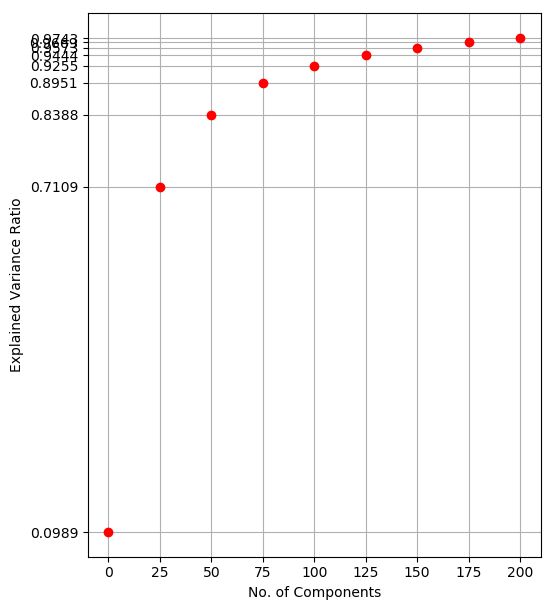

In [92]:
explained_variance = pca.explained_variance_ratio_
# ##Calculate cumulative explained ration
cum_explained_variance = [np.sum(explained_variance[:i+1]) for i in range (0, 201, 25)]
X_axis = [i for i in range(0, 201,25)]

##Plot Graph
fig = plt.figure(figsize = (5.841, 7.195), dpi=100)
plt.plot(X_axis, cum_explained_variance, 'ro')
plt.grid(True, which = 'both')
plt.yticks(cum_explained_variance)
plt.xticks(X_axis)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("No. of Components")
plt.savefig("explicationvariance.png")

Cette courbe quantifie la part de la variance totale à 412 dimensions contenue dans les N premières composantes. Par exemple, nous voyons qu'avec les chiffres, les 25 premiers composants contiennent environ 75% de la variance, alors qu'il nous faut environ 175 composants pour décrire près de 100% de la variance.

Nous voyons ici que notre projection bidimensionnelle perd beaucoup d’informations (mesurée par la variance expliquée) et qu’il nous faudrait environ 75 composantes pour conserver 90% de la variance. L'analyse de ce graphique pour rechercher un jeu de données de grande dimensions aide à comprendre le niveau de redondance présent dans plusieurs observations.

### Découpage de nos données pour l'entraînement et le test
- Partie d'entraînement: 80%
- Partie de test: 20%

In [93]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  = 0.20, random_state  = 0)

La fonction train_test_split de la librairie sklearn permet d'obtenir nos données d'entrainements mélangés dans de nouvelles variables. Nous avons fixé le paramètre test_size à 0.20 pour obtenir la partie de test à 20% des données. C'est ce qui est le plus usuel à choisir pour une proposer train/test de nos données.

### Fonction de normalisation et fonction PrincipalComponents pour retourner les n composants principaux

In [94]:

def normalize(sigma2, mean2, X):
    X = (X-mean2)/sigma2
    return X

J1 = []
J2 = []

##Take n principal components
def PrincipalComponents(n):
    pca = PCA(n_components= n) #Création du model à n composants
    X_train1 = pca.fit_transform(X_train) #On adapte le modèle à X_train et on transforme X_train
    X_test1 = pca.transform(X_test) #On n'adapte pas le modèle à X_test car on l'a déjà fait pour X_train
    return X_train1, X_test1

def PrincipalComponentsWithoutRemovingVariance(n):
    pca = PCA(n_components= n) #Création du model à n composants
    X_train1 = pca.fit_transform(X_train_first) #On adapte le modèle à X_train et on transforme X_train
    X_test1 = pca.transform(X_test_first) #On n'adapte pas le modèle à X_test car on l'a déjà fait pour X_train
    return X_train1, X_test1


## Logistic Regression

def LogisticRegression(X_train2, y_train2, X_test2, y_test2, penalty):
    regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=penalty)
    regr.fit(X_train2, y_train2) #On prépare le modèle sur les données de train X_train2 en donnant les etiquettes dans Y_train2
    score1 = regr.score(X_train2, y_train2) #On obtient le score sur les données train
    score2 = regr.score(X_test2, y_test2) #On obteint le score sur les données test
    print("Score des données d'entrainement : " + repr(score1))
    print("Score des données de test : " + repr(score2) + "\n")
    Prediction = regr.predict(X_test2) 
    return score1, score2, Prediction

### Validation croisée

Pour tester nos différentes variantes de la régression logistique, nous nous bason sur la méthode de validation croisée. 

Dans une phase d'apprentissage, le processus d'adaptation optimise les paramètres du modèle pour qu'il s'adapte au mieux aux données d'apprentissage.

Si nous prenons ensuite un échantillon indépendant de données de validation provenant de la même population que les données de formation, il s'avèrera généralement que le modèle ne correspond pas aux données de validation autant qu'il convient aux données de formation.

La taille de cette différence risque d'être importante, en particulier lorsque la taille de l'ensemble de données d'apprentissage est petite ou lorsque le nombre de paramètres dans le modèle est grand.

La validation croisée est un moyen d'estimer cet impact.

In [95]:
def validate(X_train1, y_train, X_test1, y_test):
    train_error = [] # Erreur sur les données de train
    test_error = [] # Erreur sur les données de test

    for i in range(20000, X_train1.shape[0], 1500):
        score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:], y_train[:i+1, ], 
                                                        X_test1[:i+1,:], y_test[:i+1], 0.1)
        # Ajout des erreurs dans les tableaux correspondants
        train_error.append(1-score1)
        test_error.append(1-score2)
    
    # Construction de la matrice confusion
    cm = metrics.confusion_matrix(y_test, Prediction)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    C_mean = cm_normalized

    return (train_error, test_error, C_mean)

Pour cela nous avons utilisé une variante de la validation croisée bien précise où nous augmentons progressivement le nombre de données en entrée afin de voir sa dépendance à la taille de l'echantillon en entrée.

## B. Logistic Regression

### PCA(0.8) + Logistic Regression

**D'habitude une variance de 0.8 est suffisante pour résumer la variance des données. Dans un premier temps nous partirons avec les N premiers composants de PCA pour expliquer 0.8 de la variance.**

Score des données d'entrainement : 0.8914554272286386
Score des données de test : 0.8953571428571429

Score des données d'entrainement : 0.8932142691037627
Score des données de test : 0.8955952380952381

Score des données d'entrainement : 0.8933089865658015
Score des données de test : 0.8952380952380953

Score des données d'entrainement : 0.892575813232113
Score des données de test : 0.8955952380952381

Score des données d'entrainement : 0.892657974693281
Score des données de test : 0.8958333333333334

Score des données d'entrainement : 0.8923675502708992
Score des données de test : 0.895

Score des données d'entrainement : 0.8926933554015378
Score des données de test : 0.895952380952381

Score des données d'entrainement : 0.8920691124881152
Score des données de test : 0.8951190476190476

Score des données d'entrainement : 0.8923783631761507
Score des données de test : 0.8954761904761904

Score des données d'entrainement : 0.8920032237843647
Score des données de test : 0.89571428571428

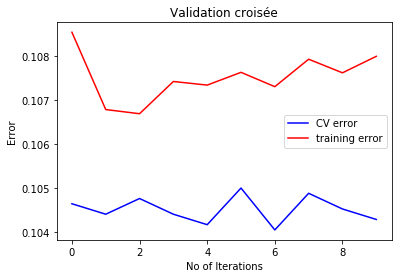

In [96]:
X_train1, X_test1 = PrincipalComponents(0.8)   # Getting principal components

train_error, test_error, C_mean = validate(X_train1, y_train, X_test1, y_test) # Cross validation

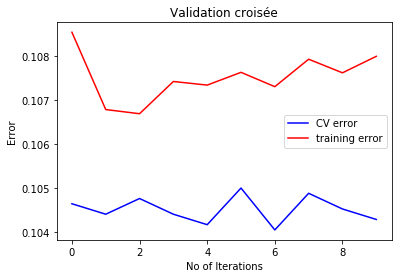

In [97]:
# Affichage de la validation croisée
plt.plot(test_error, 'b-', label = "CV error")
plt.plot(train_error, 'r-', label ="training error")
plt.legend()
plt.title("Validation croisée")
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.savefig("pca1.png")

Nous avons le taux d'erreur par itération, à chaque itération le nombre de data en entrée augmente, mais pour une avoir une idée plus précise de notre algorithme nous pouvons utiliser la matrice de confusion. 

La matrice de confusion est un outil servant à mesurer la qualité d'un système de classification.

Chaque colonne de la matrice représente le nombre d'occurrences d'une classe estimée, tandis que chaque ligne représente le nombre d'occurrences d'une classe réelle. Par classe nous parlons des labels 0 à 9. Ainsi nous pouvons voir précisément quels sont les digits les mieux reconnus et ceux pour quoi nous n'obtenons pas un bon score.

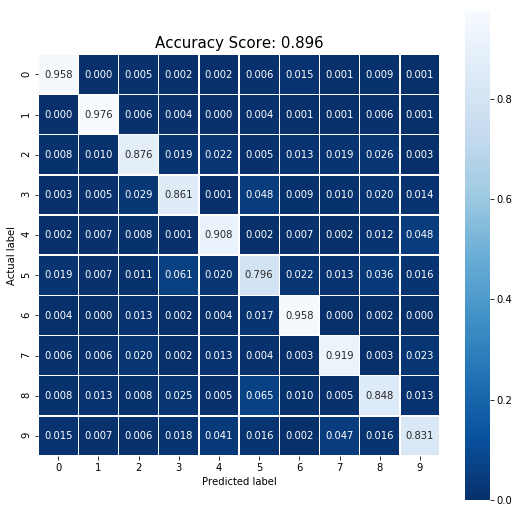

In [98]:
# Affichage de la matrice de confusion
plt.figure(figsize=(9,9))
sns.heatmap(C_mean, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(1 - test_error.pop()) 
plt.title(all_sample_title, size = 15);
plt.savefig("confusion1.png")


La matrice de confusion est, dans la terminologie de l'apprentissage supervisé, un outil servant à mesurer la qualité d'un système de classification.

Chaque colonne de la matrice représente le nombre d'occurrences d'une classe estimée, tandis que chaque ligne représente le nombre d'occurrences d'une classe réelle (ou de référence). Les occurrences utilisées pour chacune de ces deux classes doivent être différentes.

Un des intérêts de la matrice de confusion est qu'elle montre rapidement si un système de classification parvient à classifier correctement.

**Résultat :** Nous remarquons que le chiffre 5 est le moins bien reconnus des chiffres, cela peut s'expliquer par la proportion de chaque chiffre dans nos données de bases. En effet dans la visualisation des données, nous avons vu que nous avions moins de chiffres représentant un 5.

Cela signifie que notre algorithme d'apprentissage supervisé  a moins d'images représentant 5 sur lequel il peut apprendre. 

### Augmentation du nombre de composants pour améliorer les performances

- En revenant sur la courbe du taux d'erreur, nous pouvons voir que nous avons une courbe particulièrement irrégulière et une précision global non satisfaisante. Nous allons augmenter le nombre de composants pour PCA pour passer à 0.9 de la variance expliquée. 

In [ ]:
X_train1, X_test1 = PrincipalComponents(0.9)


train_error, test_error, C_mean = validate(X_train1, y_train, X_test1, y_test) # Cross validation

Score des données d'entrainement : 0.9106044697765112
Score des données de test : 0.9085714285714286

Score des données d'entrainement : 0.9115389981861308
Score des données de test : 0.909047619047619

Score des données d'entrainement : 0.9116560149558715
Score des données de test : 0.909047619047619

Score des données d'entrainement : 0.9108607811926044
Score des données de test : 0.9078571428571428

Score des données d'entrainement : 0.9107342025306719
Score des données de test : 0.9072619047619047

Score des données d'entrainement : 0.9104759826915385
Score des données de test : 0.9084523809523809

Score des données d'entrainement : 0.9101410296196683
Score des données de test : 0.9082142857142858

Score des données d'entrainement : 0.9104947378774466
Score des données de test : 0.9088095238095238

Score des données d'entrainement : 0.9100965594825162
Score des données de test : 0.9092857142857143



In [ ]:
# Affichage de la validation croisée
plt.plot(test_error, 'b-', label = "CV error")
plt.plot(train_error, 'r-', label ="training error")
plt.legend()
plt.title("Validation croisée")
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.savefig("pca2.png")

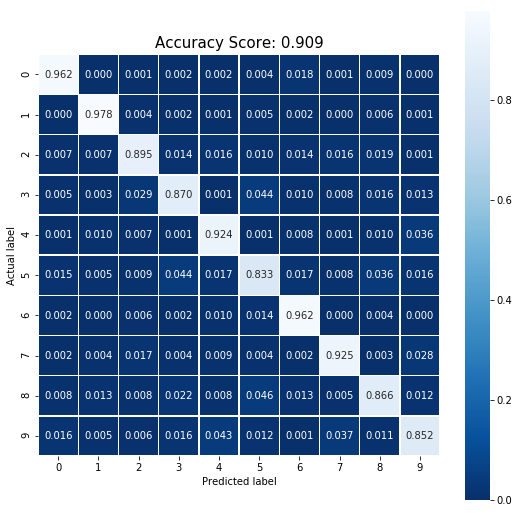

In [56]:
# Affichage de la matrice de confusion
plt.figure(figsize=(9,9))
sns.heatmap(C_mean, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(1 - test_error.pop()) 
plt.title(all_sample_title, size = 15);
plt.savefig("confusion2.png")

Nous avons donc fait la régression logistique sur un ensemble de plus grande dimension pourtant la précision n'a pas autant augmenté. Cela signifie que jouer sur le nombre de composants n'est pas le paramètre qui nous permet d'améliorer notre algorithme et il faut chercher une autre façon d'améliorer notre algorithme.

**Nous repartons pour un nombre de composant PCA expliquant 0.8 de la variance en faisant la régression sur un polynôme de degré 2.**

## C. Ajout de polynômes de degré supérieur

La régression simple n'étant pas été un succés, nous allons ajouter des polynomes à notre étude.

Le polynomial features va nous permettre de trouver toutes les fonctions polynomiale (ici quadratique le degree étant à égal à 2 par défaut) correspondant le mieux à notre ensemble de données. On pourra ainsi obtenir des prédictions plus précise.

##### Régression Logistique

(8400, 43) (33600, 43)
(8400, 989) (33600, 989)
Score des données d'entrainement : 0.99950002499875
Score des données de test : 0.9717857142857143

Score des données d'entrainement : 0.9993953769592112
Score des données de test : 0.9726190476190476

Score des données d'entrainement : 0.999478283552889
Score des données de test : 0.9721428571428572

Score des données d'entrainement : 0.9992653361087303
Score des données de test : 0.9721428571428572

Score des données d'entrainement : 0.9991923387562017
Score des données de test : 0.9730952380952381

Score des données d'entrainement : 0.9992000290898513
Score des données de test : 0.9736904761904762

Score des données d'entrainement : 0.9990689976207717
Score des données de test : 0.9738095238095238

Score des données d'entrainement : 0.9988524966394544
Score des données de test : 0.974047619047619

Score des données d'entrainement : 0.9985937939439392
Score des données de test : 0.9745238095238096

Score des données d'entrainement : 0.9

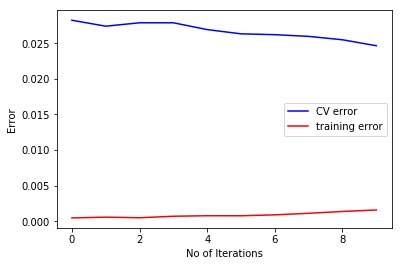

In [74]:
from sklearn.preprocessing import PolynomialFeatures

#on instancie l'algorithme de PCA en prenant un nombre de composants expliquant 0.8388 de la variance
#il s'agit de la valeur optimale déterminée précédemment sur la courbe
#cela va permettre de réduire le nombre de colonnes pour ne garder que celles qui sont importantes : on gagne un temps considérable d'exécution
poly = PolynomialFeatures(include_bias = False)
X_train1, X_test1 = PrincipalComponents(0.81)
print(X_test1.shape, X_train1.shape)

#on transforme les données pour aider par la suite le modèle Logistic Regression à mieux comprendre les relations entre les données
X_train1 = poly.fit_transform(X_train1)
X_test1 = poly.transform(X_test1)

#on normalise les données obtenues afin de les mettre sur la même plage de données. On obtient ainsi une meilleure performance et un gain de temps d'exécution
print(X_test1.shape, X_train1.shape)
sigma = np.std(X_train1, axis = 0)
mean = np.mean(X_train1, axis = 0)

X_train1 = normalize(sigma , mean , X_train1)
X_test1 = normalize(sigma , mean, X_test1)

#on applique une variante de la validation croisée sur les données
#on obtient alors l'erreur d'apprentissage en fonction de la taille des données, et l'erreur de la validation croisée en fonction de la taille des données
J1, J2, Confusion_matrix = validate(X_train1, y_train, X_test1, y_test)


In [ ]:
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

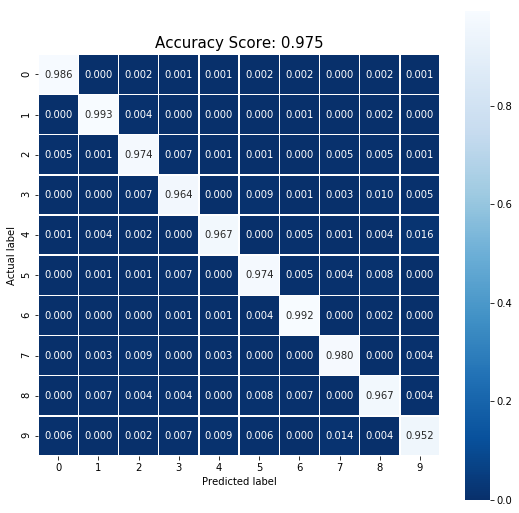

In [76]:

plt.figure(figsize=(9,9))
sns.heatmap(C_mean, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(1 - J2.pop()) 
plt.title(all_sample_title, size = 15);



**Nous avons une meilleure précision, la courbe d'erreure est de plus stable. Nous avons donc bien fait de ne pas augmenter le nombre de composants mais de chercher à augmenter le degré du polynôme dans la logistic regression.**

#### Sauvegarde des données testé avec la régression logistique

In [22]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

X1 = poly.fit_transform(X1)
Test1 = poly.fit_transform(Test1)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=0.1)
regr.fit(X1, Y)
score1 = regr.score(X1, Y)
print(score1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv('out_reg1.csv', 
                                                                      index=False, header=True)

(42000, 51) (28000, 51)
(42000, 1377) (28000, 1377)
(42000, 1377) (28000, 1377)
0.9994761904761905


-Il apparait que ce modèl est plus performant. C'est donc celui qui sera gardé. 


#### Les données ont été soumise et ont obtenu un score de 0.9815. 